In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22983


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22978,2021-05-14,47,沖縄県,134,13621,0,140
22979,2021-05-15,47,沖縄県,160,13781,1,141
22980,2021-05-16,47,沖縄県,78,13859,0,141
22981,2021-05-17,47,沖縄県,59,13918,1,142
22982,2021-05-18,47,沖縄県,168,14086,4,146


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10758,7585,131
43,香川県,18093,1832,24
44,高知県,19071,1173,20
45,鳥取県,15159,442,2
46,鹿児島県,22494,2946,28


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
22976,2021-05-12,47,沖縄県,109,13361,1,140,594.0
22977,2021-05-13,47,沖縄県,126,13487,0,140,681.0
22978,2021-05-14,47,沖縄県,134,13621,0,140,733.0
22979,2021-05-15,47,沖縄県,160,13781,1,141,800.0
22980,2021-05-16,47,沖縄県,78,13859,0,141,775.0
22981,2021-05-17,47,沖縄県,59,13918,1,142,798.0
22982,2021-05-18,47,沖縄県,168,14086,4,146,834.0


In [5]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数"]]
latest.head()

,都道府県名,直近1週間の感染者数
488,北海道,3796.0
977,青森県,171.0
1466,岩手県,135.0
1955,宮城県,222.0
2444,秋田県,91.0


In [6]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数
0,三重県,11736,4531,97,315.0
1,京都府,12714,14885,197,957.0
2,佐賀県,20049,2279,16,237.0
3,兵庫県,13692,37917,1024,1989.0
4,北海道,489,31307,952,3796.0


## 人口データを付与

In [7]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [8]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口
0,三重県,11736,4531,97,315.0,1813859
1,京都府,12714,14885,197,957.0,2545899
2,佐賀県,20049,2279,16,237.0,823810
3,兵庫県,13692,37917,1024,1989.0,5549568
4,北海道,489,31307,952,3796.0,5267762


## 人口当たりの感染者数

In [9]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,489,31307,952,3796.0,5267762,59.431311,594.313107,72.060963
41,青森県,978,2009,27,171.0,1275783,15.747192,157.471921,13.403533
19,岩手県,1467,1257,41,135.0,1235517,10.173879,101.738786,10.926600
11,宮城県,1956,8608,80,222.0,2292385,37.550411,375.504115,9.684237
36,秋田県,2445,711,11,91.0,985416,7.215227,72.152269,9.234679
15,山形県,2934,1751,37,129.0,1082296,16.178569,161.785685,11.919105
35,福島県,3423,4288,131,320.0,1881981,22.784502,227.845021,17.003360
38,茨城県,3912,9125,138,446.0,2921436,31.234639,312.346394,15.266465
27,栃木県,4401,5910,74,260.0,1965516,30.068440,300.684400,13.228079
37,群馬県,4890,7304,119,463.0,1969439,37.086703,370.867034,23.509233


## 感染者数

### 平均値、中央値

In [10]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      14694.553191
std       27674.823664
min         442.000000
25%        2144.000000
50%        4401.000000
75%        8955.500000
max      153390.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [11]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6357,153390,1969,5298.0,13834925,110.871580,1108.715804,38.294389
1,大阪府,13203,95666,2014,4482.0,8849635,108.101634,1081.016336,50.646157
2,神奈川県,6846,58317,859,2066.0,9209442,63.323055,633.230548,22.433498
3,埼玉県,5379,41873,767,1587.0,7390054,56.661291,566.612910,21.474809
4,愛知県,11247,41673,686,3920.0,7575530,55.010013,550.100125,51.745554
5,兵庫県,13692,37917,1024,1989.0,5549568,68.324237,683.242371,35.840628
6,千葉県,5868,35688,657,1012.0,6319772,56.470392,564.703917,16.013236
7,北海道,489,31307,952,3796.0,5267762,59.431311,594.313107,72.060963
8,福岡県,19560,30868,396,3262.0,5129841,60.173405,601.734050,63.588716
9,京都府,12714,14885,197,957.0,2545899,58.466577,584.665770,37.589865


## １万人あたりの感染者数

### 平均値、中央値

In [12]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      34.611367
std       24.834646
min        6.727276
25%       18.182774
50%       26.229804
75%       46.161324
max      110.871580
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [13]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,489,31307,952,3796.0,5267762,59.431311,594.313107,72.060963
34,福岡県,19560,30868,396,3262.0,5129841,60.173405,601.734050,63.588716
18,岡山県,16137,6374,74,1117.0,1903627,33.483450,334.834503,58.677461
28,沖縄県,22983,14086,146,834.0,1481547,95.076295,950.762953,56.292510
21,広島県,16626,8786,114,1480.0,2826858,31.080443,310.804434,52.354947
24,愛知県,11247,41673,686,3920.0,7575530,55.010013,550.100125,51.745554
9,大阪府,13203,95666,2014,4482.0,8849635,108.101634,1081.016336,50.646157
17,岐阜県,10269,7649,145,882.0,2032490,37.633641,376.336415,43.395047
26,東京都,6357,153390,1969,5298.0,13834925,110.871580,1108.715804,38.294389
30,熊本県,21027,5585,89,672.0,1769880,31.555812,315.558117,37.968676


## グラフ化

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [15]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


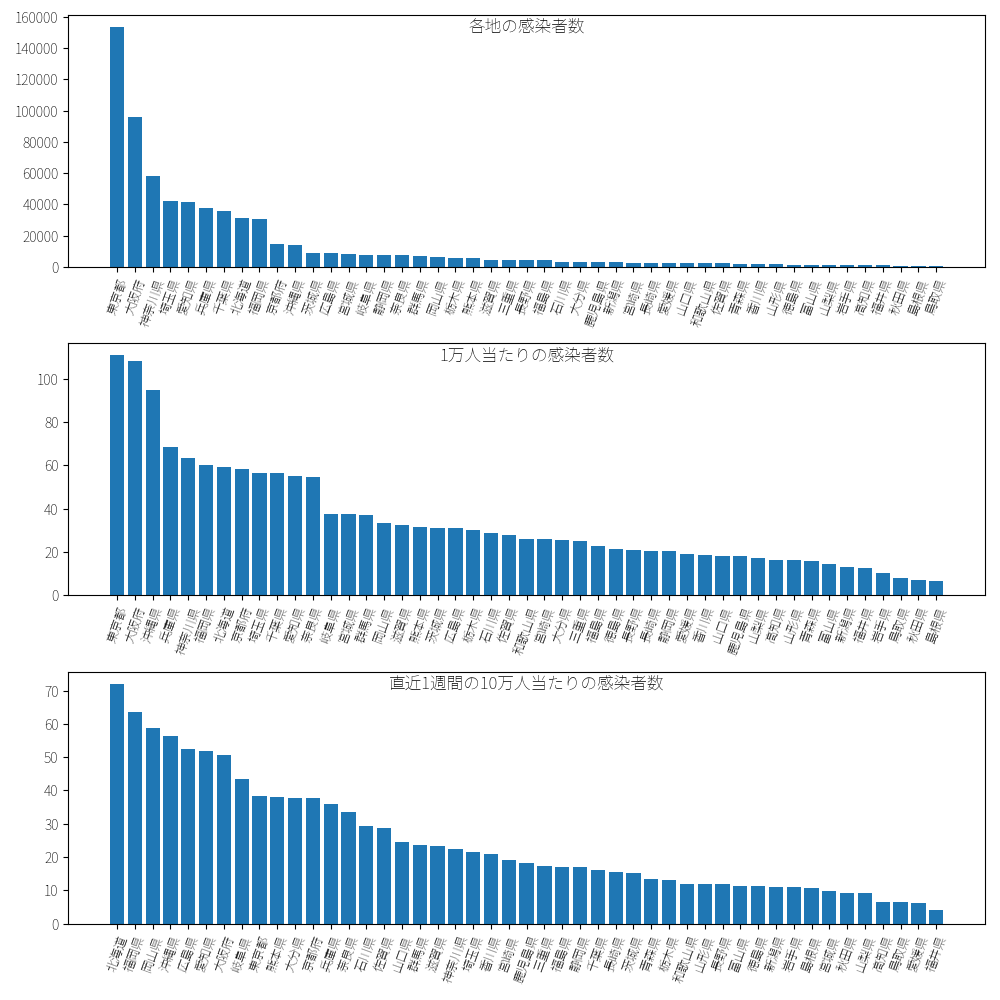

In [16]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(3,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(3,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの感染者数",y=0.9)

fig.tight_layout()


## 度数分布表

In [17]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   442.   19560.5  38679.   57797.5  76916.   96034.5 115153.  134271.5
 153390. ]


## ヒストグラム

<IPython.core.display.Javascript object>


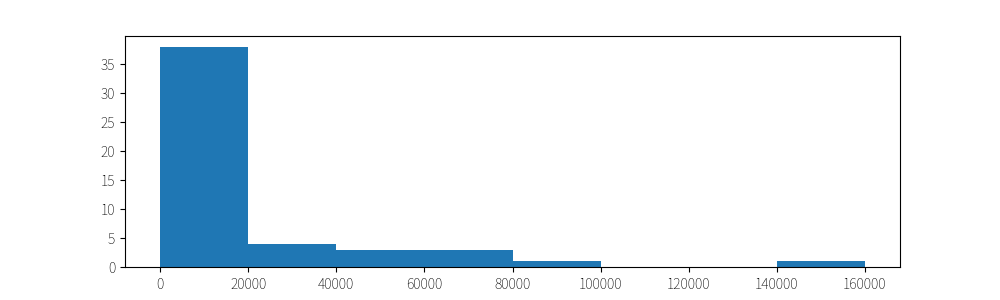

(array([38.,  4.,  3.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [18]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


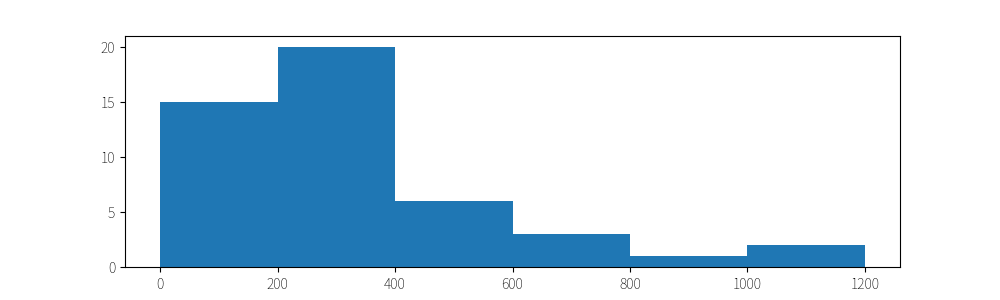

(array([15., 20.,  6.,  3.,  1.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [21]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
